In [67]:
import pandas as pd

In [68]:
import numpy as np

In [69]:
import math

In [70]:
train=pd.read_csv('f:/net4trainsparse.csv',usecols=[1,2,3])
test=pd.read_csv('f:/net4testsparse.csv',usecols=[1,2,3])

In [71]:
no_movies = 9318
no_users = 8141

In [72]:
train.head()

,userId,itemId,rating
0,569,2705,5.0
1,7993,4709,4.0
2,5021,6516,5.0
3,7840,1573,1.0
4,7220,3882,2.0


In [73]:
movies_mean=np.zeros(shape=[no_movies,3])

In [74]:
user_total=np.zeros(no_users)
cnt=np.zeros(no_users,dtype='int64')
for i, row in enumerate(train.itertuples(), 1):
    p=int(row.itemId)
    movies_mean[p][0]+=1
    movies_mean[p][1]+=row.rating
    k=int(row.userId)
    cnt[k]+=1
    user_total[k]+=row.rating
 

In [75]:
user_mean=np.array([ i/j for i,j in zip(user_total,cnt) ])
for x in movies_mean:
    x[2]=round(x[1]/x[0],2)
    
for x in movies_mean:
    if math.isnan(x[2]):
        x[2]=0
        


In [76]:
for i in range(len(user_mean)):
    if math.isnan(user_mean[i]):
        user_mean[i]=0

In [77]:
foruser=np.zeros(no_users)
formovies=np.zeros(no_movies)
for i, row in enumerate(train.itertuples(), 1):
    mov=int(row.itemId)
    usr=int(row.userId)
    foruser[usr]+=movies_mean[mov][2]
    formovies[mov]+=user_mean[usr]

In [78]:
import time

In [79]:
%matplotlib inline
import matplotlib.pyplot as plt

In [80]:
rmse=[]
mae=[]
gim=[]
gpim=[]
precission=[]
recall=[]
Beta=[i/10 for i in range(1,11)]
for beta in Beta:
    error=0
    err1=0
    g2=0
    gp2=0
    tp=0
    fp=0
    tn=0
    fn=0
    c_gim=0
    c_gpim=0
    c=0
    for i, row in enumerate(test.itertuples(), 1):
        
        mov=int(row.itemId)
        usr=int(row.userId)
        actual=row.rating
        predicted_rating=0
    
    
        usr_mean=user_mean[usr]
    
        item_mean=movies_mean[mov][2]
        usr_rated=cnt[usr]
        usr_tendency=0
        if usr_rated!=0:
            usr_tendency=(user_total[usr]-foruser[usr])/usr_rated
   
        no_of_ratings=movies_mean[mov][0]
        item_tendency=0
        if no_of_ratings!=0:
            item_tendency=(movies_mean[mov][1]-formovies[mov])/no_of_ratings
   
        if usr_tendency>=0 and item_tendency>=0:
            predicted_rating=max(usr_mean+item_tendency,item_mean+usr_tendency)
    
        elif usr_tendency<0 and item_tendency<0:
            predicted_rating=min(usr_mean+item_tendency,item_mean+usr_tendency)
    
        elif usr_tendency<0 and item_tendency>=0 and item_mean>usr_mean:
            predicted_rating=min(max(usr_mean, (item_mean+usr_tendency)*beta + (usr_mean+item_tendency)*(1-beta)),item_mean)
        
        elif usr_tendency>=0 and item_tendency<0 and item_mean<usr_mean:
            predicted_rating=min(max(item_mean, (item_mean+usr_tendency)*beta + (usr_mean+item_tendency)*(1-beta)),usr_mean)
        else:
            predicted_rating=((item_mean*beta) +usr_mean*(1-beta))
    
        error+=((actual-predicted_rating)**2)
        err1+=math.fabs(actual-predicted_rating)
        c+=1
        if actual >=3:
            g2+=abs(actual-predicted_rating)
            c_gim+=1
        if predicted_rating >=3:
            gp2+=abs(actual-predicted_rating)
            c_gpim+=1
    
        if actual>=3 and predicted_rating>=3:
            tp+=1
        elif actual<3 and predicted_rating>=3:
            fp+=1
        elif actual>=3 and predicted_rating<3:
            fn+=1
        else:
            tn+=1
    
    gim.append(g2/c_gim)
    gpim.append(gp2/c_gpim)
    precission.append(tp/(tp+fp))
    recall.append(tp/(tp+fn))
    rmse.append(math.sqrt(error/c))
    mae.append(err1/c)

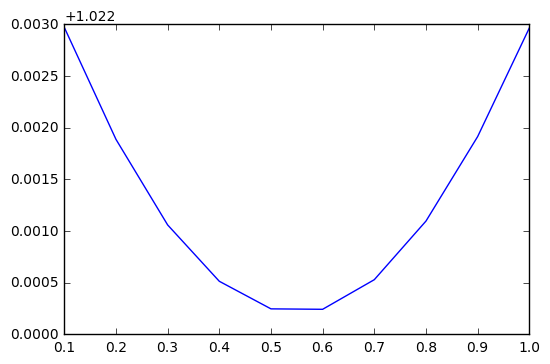

In [81]:
plt.plot(Beta,rmse)

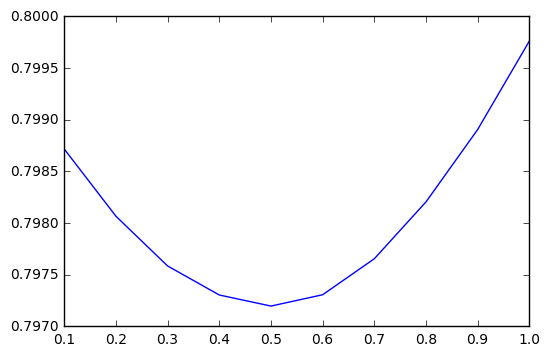

In [82]:
plt.plot(Beta,mae)

In [83]:
mae

[0.7987162236028456,
 0.7980661424685862,
 0.7975850286202343,
 0.7973043266929115,
 0.7971971838289703,
 0.7973067640057014,
 0.7976550582438018,
 0.7982049525900567,
 0.7989053492843137,
 0.7997611336180067]

In [84]:
rmse

[1.0249713485232235,
 1.0238879731954402,
 1.0230599459682697,
 1.0225144697523239,
 1.0222475695495399,
 1.0222433578245953,
 1.0225299669623267,
 1.0230971381947802,
 1.0239145908625242,
 1.0249654100591656]

In [85]:
gim

[0.69486488702785343,
 0.69402821157227501,
 0.69338465911432046,
 0.6929633159652312,
 0.69273843774617216,
 0.69275847857706285,
 0.69304101238895188,
 0.69355297930286708,
 0.69424259676316069,
 0.69511330619819267]

In [86]:
gpim

[0.77221566040326883,
 0.77192787790188377,
 0.77136862167045817,
 0.77101524596086735,
 0.77041097518366564,
 0.77047014170862738,
 0.77108248503473287,
 0.77221994939423799,
 0.77260607179177088,
 0.77320666233107704]

In [87]:
precission

[0.891981179297227,
 0.8917932826869253,
 0.891962056914628,
 0.8921656686626747,
 0.8922624389271113,
 0.8923813800329292,
 0.8918407017893635,
 0.8917422958013363,
 0.8915951287682172,
 0.8915277916375611]

In [88]:
recall

[0.8013670908845618,
 0.8024014030669605,
 0.8034357152493592,
 0.8040203264828889,
 0.804829788190853,
 0.8043351171470972,
 0.8046499078113055,
 0.8042002068624364,
 0.8033457750595854,
 0.803525655439133]